# Electronic Store Sales Analysis

## A- Importing libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## B- Reading and merging data

In [2]:
files = [file for file in os.listdir('./data')]

all_sales = pd.DataFrame()

for file in files:
    file_df = pd.read_csv('./data/'+file)
    all_sales = pd.concat([all_sales, file_df])
    
# exporting the full data
all_sales.to_csv("./data/combined_sales.csv", index=False)

In [13]:
df = pd.read_csv('data/combined_sales.csv')


## C- Data exploring and cleaning

In [14]:
# exploring and removing the missing values
df_temp = df[df.isnull().any(axis=1)]

df = df.dropna()

In [15]:
# exploring statistics of the data
df.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,217352,217352,217352,217352,217352,217352
unique,207236,20,12,24,158152,157937
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,423,25544,196633,25544,423,423


In [16]:
# data contain extra headers to be cleaned

temp_df = df[df['Purchase Address'].str[:] == 'Purchase Address']

df = df[df['Purchase Address'].str[:] != 'Purchase Address']

In [17]:
#exploring count of products sold
df.groupby(['Product']).count()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address
Product,,,,,
20in Monitor,4693,4693,4693,4693,4693
27in 4K Gaming Monitor,7168,7168,7168,7168,7168
27in FHD Monitor,8584,8584,8584,8584,8584
34in Ultrawide Monitor,7064,7064,7064,7064,7064
AA Batteries (4-pack),23506,23506,23506,23506,23506
AAA Batteries (4-pack),23424,23424,23424,23424,23424
Apple Airpods Headphones,17609,17609,17609,17609,17609
Bose SoundSport Headphones,15578,15578,15578,15578,15578
Budget Phone,2268,2268,2268,2268,2268


In [19]:
# converting order date into proper datetime format
df['Order Date'] =pd.to_datetime(df['Order Date'],format="%y/%m/%d %H:%M")
df['Hour'] = df['Order Date'].dt.hour

In [20]:
# extracting purshase address details & getting cities column

df['Address'] = df['Purchase Address'].apply(lambda x: x.split(',')[0])
df['City'] = (df['Purchase Address'].apply(lambda x: x.split(',')[1]))+ (',') + df['Purchase Address'].str[-8:-5]
df['Zip Code'] = df['Purchase Address'].str[-5:]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Address,City,Zip Code
0,311859,AAA Batteries (4-pack),1,2.99,2020-04-12 20:43:00,"470 Cedar St, Dallas, TX 75001",20,470 Cedar St,"Dallas,TX",75001
1,311860,USB-C Charging Cable,1,11.95,2020-04-08 23:42:00,"917 Center St, Los Angeles, CA 90001",23,917 Center St,"Los Angeles,CA",90001
2,311861,Flatscreen TV,1,300.0,2020-04-06 18:21:00,"347 Church St, San Francisco, CA 94016",18,347 Church St,"San Francisco,CA",94016
3,311862,27in FHD Monitor,1,149.99,2020-04-27 22:32:00,"604 Main St, Dallas, TX 75001",22,604 Main St,"Dallas,TX",75001
4,311863,AA Batteries (4-pack),1,3.84,2020-04-16 09:33:00,"443 Johnson St, Portland, OR 97035",9,443 Johnson St,"Portland,OR",97035


In [21]:
# total income per order
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float')
df['Total'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Address,City,Zip Code,Total
0,311859,AAA Batteries (4-pack),1,2.99,2020-04-12 20:43:00,"470 Cedar St, Dallas, TX 75001",20,470 Cedar St,"Dallas,TX",75001,2.99
1,311860,USB-C Charging Cable,1,11.95,2020-04-08 23:42:00,"917 Center St, Los Angeles, CA 90001",23,917 Center St,"Los Angeles,CA",90001,11.95
2,311861,Flatscreen TV,1,300.00,2020-04-06 18:21:00,"347 Church St, San Francisco, CA 94016",18,347 Church St,"San Francisco,CA",94016,300.00
3,311862,27in FHD Monitor,1,149.99,2020-04-27 22:32:00,"604 Main St, Dallas, TX 75001",22,604 Main St,"Dallas,TX",75001,149.99
4,311863,AA Batteries (4-pack),1,3.84,2020-04-16 09:33:00,"443 Johnson St, Portland, OR 97035",9,443 Johnson St,"Portland,OR",97035,3.84


## D- Data Analysis

### 1- What are the best months in terms of sales?

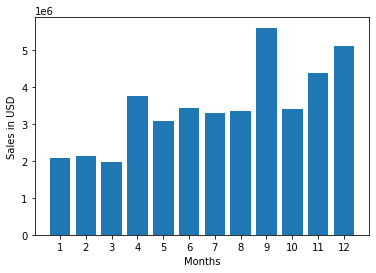

In [22]:
#explaring the months sales

df['month'] = pd.DatetimeIndex(df['Order Date']).month
results = df.groupby(['month']).sum()

#plotting the monthly sales
month = range (1,13)

plt.bar(month, results['Total'])
plt.xticks(month)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.show()

#There is a big increase in sales after March probabaly related to Covid-19 lockdown. 
#there are noticable increase in sales too during the holiday season in the end of the year.
#and during Sept probabaly beacuse of the return to school and increased demand for electronic devices.

### 2- What are the cities that generated the most income?

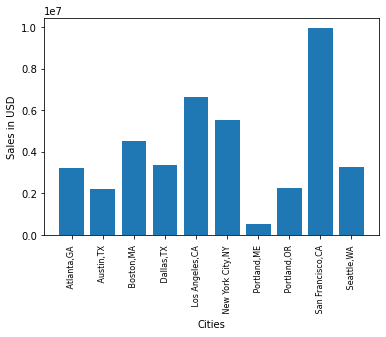

In [30]:
results_city = df.groupby(['City']).sum()

#plotting the sales per city

Cities = [city for city, df in df.groupby('City')]

plt.bar(Cities, results_city['Total'])
plt.xticks(Cities, rotation='vertical', size =8)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show()

#Clearly California region represented a big chunck of sales.

### 3- What is the best time to display advertisments?

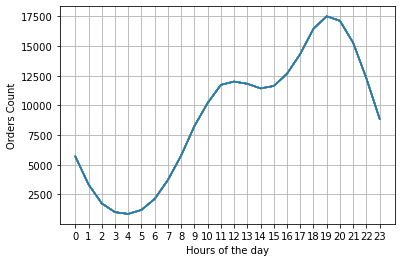

In [32]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('Orders Count')
plt.xlabel('Hours of the day')
plt.grid()
plt.show()

#Orders peaked around 7 pm. ads just before 7 pm is more likely to generate sales.

### 4- What are the products most often sold together?

In [25]:
#removing non - duplicated order ID (keeping the orders with more than 1 product)

df_list = df[df.duplicated(subset=['Order ID'], keep = False)]

# creating a backet list of all prodcuts of the same order
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df_list['Shopping list'] = df_list.groupby('Order ID')['Product'].transform(lambda X: ',' .join(X))


df_list = df_list[['Order ID', 'Shopping list']].drop_duplicates()
df_list.head()

<ipython-input-25-cc520e63a856>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['Shopping list'] = df_list.groupby('Order ID')['Product'].transform(lambda X: ',' .join(X))


,Order ID,Shopping list
21,311879,"USB-C Charging Cable,Wired Headphones"
81,311938,"Apple Airpods Headphones,Wired Headphones"
83,311939,"Samsung Phone,USB-C Charging Cable"
89,311943,"USB-C Charging Cable,AAA Batteries (4-pack)"
98,311951,"Lightning Charging Cable,34in Ultrawide Monitor"


In [26]:
# counting the occurance of the products in the list
# Referencing: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df_list['Shopping list']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print (key, value)
    
#Phones and thier suitable charger are the most comman combination of products

('Samsung Phone', 'USB-C Charging Cable') 1649
('IPhone', 'Lightning Charging Cable') 1156
('Samsung Phone', 'Wired Headphones') 725
('IPhone', 'Wired Headphones') 573
('IPhone', 'Apple Airpods Headphones') 414
('Budget Phone', 'USB-C Charging Cable') 402
('Samsung Phone', 'Bose SoundSport Headphones') 395
('USB-C Charging Cable', 'Wired Headphones') 208
('Budget Phone', 'Wired Headphones') 188
('Lightning Charging Cable', 'Wired Headphones') 135


### 5- What are the most sold products? and why?

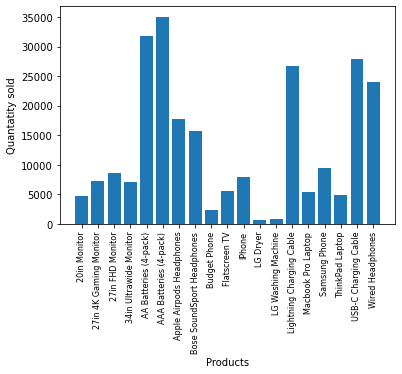

In [28]:
#groupby product and the quantitiy sold
products = df.groupby('Product')
quantitiy_sold = products.sum()['Quantity Ordered']

product_list = [product for product, df in products]

plt.bar(product_list, quantitiy_sold)
plt.xticks(product_list, rotation='vertical', size =8)
plt.ylabel('Quantatity sold')
plt.xlabel('Products')
plt.show()

#Batteries and chargers are the most sold products

### 5- b Why these products sold too much?

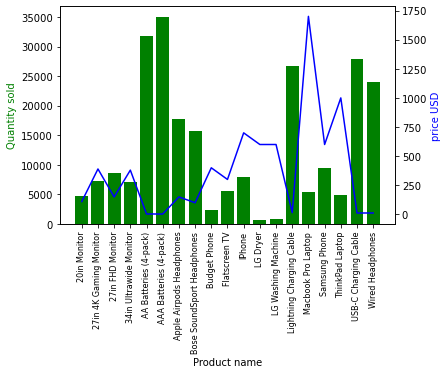

In [29]:
# probably there is a relation between the price and quantitity sold 
#( the cheaper the product the more likely it is sold)
prices = df.groupby('Product').mean()['Price Each']


#plotting price overlay with quantities sold to explore the relation

fig, ax1= plt.subplots()

ax2 = ax1.twinx()

ax1.bar(product_list, quantitiy_sold, color = 'g')
ax2.plot(product_list, prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_xticklabels(product_list, rotation = 'vertical', size = 8)
ax1.set_ylabel('Quantity sold', color = 'g')
ax2.set_ylabel('price USD' , color = 'b')

plt.show()

#as assumed, batteries have the lowest prices so they generated the highest number of orders.